# What is correlation?

### Let's test and practice to understand better

## 🤓☝️ Remember


<img src='images/Correlation.png' style='width: 600px'>

No need to explain better than here:

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient




In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

### 🫵 Your turn: Generate two sets of random data X and Y


In [2]:
points_number = 100
points_per_trace = 1
value_max = 8
X =  np.random.randint(value_max, size=points_number)
Y =  np.random.randint(value_max, size=points_number)

In [3]:
print(X)
print(Y)

[3 3 2 2 0 6 4 6 7 6 7 3 0 1 4 5 1 6 6 0 7 6 5 0 0 0 2 2 0 6 5 5 6 0 1 5 5
 0 4 0 4 4 1 3 5 4 1 5 7 6 1 6 3 4 3 5 3 0 4 0 7 0 4 2 0 5 0 3 7 4 6 4 4 3
 6 1 7 6 6 2 5 4 7 1 2 7 7 3 0 2 0 2 4 2 6 1 0 6 1 3]
[2 2 4 0 1 7 5 4 0 6 6 7 1 6 0 5 0 0 7 6 7 1 4 7 7 1 6 7 4 0 7 4 2 1 2 0 1
 2 1 5 0 1 0 1 4 6 2 5 4 5 2 3 1 1 4 6 3 0 4 6 1 5 1 4 5 3 2 0 3 6 6 2 5 3
 1 3 5 5 7 1 2 4 3 5 1 6 3 3 7 6 5 7 5 6 2 1 5 4 4 2]


### 🫵 Your turn: use `np.corrcoef` from https://numpy.org/devdocs/reference/generated/numpy.corrcoef.html

In [4]:
XX = X
np.corrcoef(XX,X)[1][0]

0.9999999999999998

In [5]:
np.corrcoef(X,Y)[1][0]

0.027826559959458964

### 🫵 Your turn: Generate two sets of points (traces) 

In [6]:
traces_number = 1000
points_per_trace = 500
value_max = 255
Trace_set_A =  np.random.randint(value_max, size=(points_per_trace,traces_number))
Trace_set_B =  np.random.randint(value_max, size=(points_per_trace,traces_number))

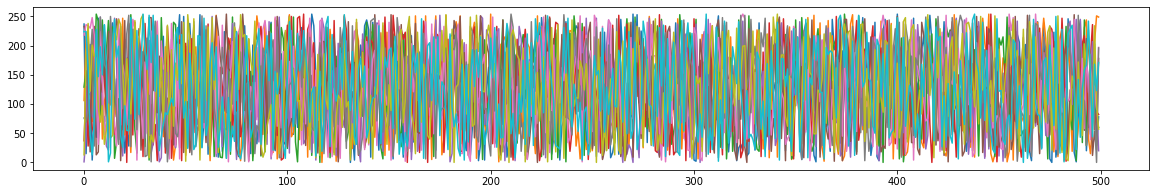

In [7]:
plt.rcParams["figure.figsize"]=[20, 3]

for i in range(10): plt.plot(Trace_set_A[:, i])
plt.show()

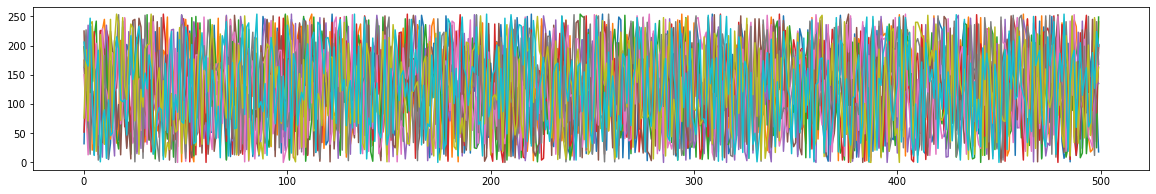

In [8]:
for i in range(10): plt.plot(Trace_set_B[:, i])
plt.show()

In [9]:
correlation_trace = []
for i in range(points_per_trace):   
    corr_point = np.corrcoef(Trace_set_A[i,:], Trace_set_B[i,:])[1][0]
    correlation_trace.append(corr_point)

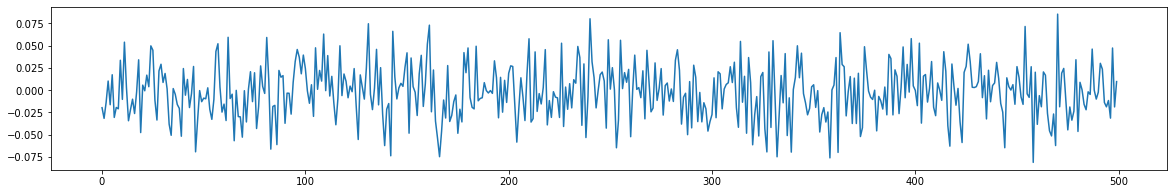

In [10]:
plt.plot(correlation_trace)
plt.show()

In [14]:
leaking_point_x = 200

a = 5
b = 10
# you can change the value here and observe

Trace_set_A_leak = Trace_set_A
Trace_set_B_leak = Trace_set_B

for i in range(traces_number): 
    Trace_set_A_leak[leaking_point_x,i] = a*Trace_set_B_leak[leaking_point_x,i]+b

In [15]:
correlation_trace = []
for i in range(points_per_trace):   
    corr_point = np.corrcoef(Trace_set_A_leak[i,:], Trace_set_B_leak[i,:])[1][0]
    correlation_trace.append(corr_point)

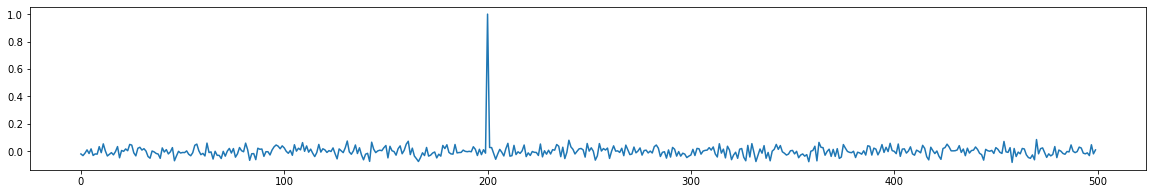

In [16]:
plt.plot(correlation_trace)
plt.show()

In [31]:
leaking_point_x = 300

a = -10
b = 20
# you can change the value here and observe


for i in range(traces_number): 
    Trace_set_A_leak[leaking_point_x,i] = a*Trace_set_B_leak[leaking_point_x,i]+b

In [32]:
correlation_trace = []
for i in range(points_per_trace):   
    corr_point = np.corrcoef(Trace_set_A_leak[i,:], Trace_set_B_leak[i,:])[1][0]
    correlation_trace.append(corr_point)

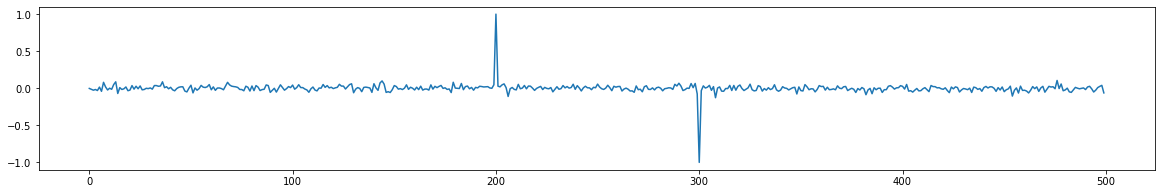

In [33]:
plt.plot(correlation_trace)
plt.show()

--------
## Now consider

- X = set of power traces collected with n points on the device executing crypto operation you want to attack --> C 
- Y = the modeled traces you are building from guesses on keys --> W 
-- with W = aH(data) + B + noise

Applying correlation between X and Y will tell you if there is a dependancy between X and Y and then ... will validate your guesses on the keys

<img src='images/CPA formula.png' style='width: 600px'>